# 1. Frames

## Task 1.1 - Homogeneous transformation

In [1]:
import numpy as np

def get_RX(theta):
    R = np.array([[1., 0., 0.],
                    [0., np.cos(theta), -np.sin(theta)],
                    [0., np.sin(theta), np.cos(theta)]])
    return R

def get_RY(theta):
    R = np.array([[np.cos(theta), 0., np.sin(theta)],
                    [0., 1., 0.],
                    [-np.sin(theta), 0., np.cos(theta)]])
    return R

def get_RZ(theta):
    R = np.array([[np.cos(theta), -np.sin(theta), 0.],
                    [np.sin(theta), np.cos(theta), 0.],
                    [0., 0., 1.]])
    return R


def get_homogeneous_transform(R, t):
    R = np.deg2rad(R)
    rx = get_RX(R[0])
    ry = get_RY(R[1])
    rz = get_RZ(R[2])
    rotation = rz @ ry @ rx
    top = np.hstack((rotation, t[np.newaxis].T))
    transformation = np.vstack((top, np.array([0, 0, 0, 1])))
    return transformation

# Test
T_W_R = get_homogeneous_transform(np.array([0.0,0.0,30.0]), np.array([4.3,5.1,0.0]))
T_R_W = np.linalg.inv(get_homogeneous_transform(np.array([0.0,0.0,30.0]), np.array([4.3,5.1,0.0])))

print(T_W_R)
print(T_R_W)

[[ 0.8660254 -0.5        0.         4.3      ]
 [ 0.5        0.8660254  0.         5.1      ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]
[[ 0.8660254   0.5         0.         -6.27390924]
 [-0.5         0.8660254   0.         -2.26672956]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


## Task 1.2 - Gimbal Lock
#### What is Gimbal Lock?
* <b>Gimbal lock</b> results in the loss of one degree of freedom. For example in a 3D space, if two out of three axis happen to drive in a parallel configuration (lock), then only available rotations will be in a 2D space. The only way to avoid gimbal lock, is to take a different approach to describe rotation. <b>Quaternions</b> are one of the popular ways to <b>solve this problem</b>.
<br> If we consider 3D space as 3 gimbal inside eatch other, any axis rotation (or sequence of rotations) that causes the middle gimbal to become parallel to the other two axis, causes a gimbal lock, thus losing one degree of freedom. Quaternion parametrization which is alos widely used in ROS2, extends a 3D representation of space into four dimension as described below:
<br>
$
  q = w + xi + yj + zk
$

In [2]:
#### Choose "proper" angles alpha1,... etc. to illustrate the Gimbal lock
alpha1 = np.pi/3
beta1 = -np.pi/2
gamma1 = -np.pi/4

alpha2 = -np.pi/4
beta2 = -np.pi/2
gamma2 = np.pi/3

p = np.array([1., 1., 1.])
p_a = get_RZ(alpha1) @ get_RY(beta1) @ get_RX(gamma1).dot(p)
p_b = get_RZ(alpha2) @ get_RY(beta2) @ get_RX(gamma2).dot(p)

print(p_a)
print(p_b)

[-1.22474487  0.70710678  1.        ]
[-1.22474487  0.70710678  1.        ]


# 2. Matrices and vectors

## Task 2.1 - PCA
The file data/20.pcd contains a point cloud of the object shown below.
Since the object could be laying in any orientation, the robot needs to know the direction of the longest axis so that
the gripper can be aligned with it for grasping.
1. Load the data. The file has three space-separated columns representing the $x$, $y$, and $z$ coordinates of the
points.
2. Estimate the direction of the longitudinal axis by applying the concept of eigenvalues/eigenvectors.
3. Plot the longitudinal axis using the given plot_line function.

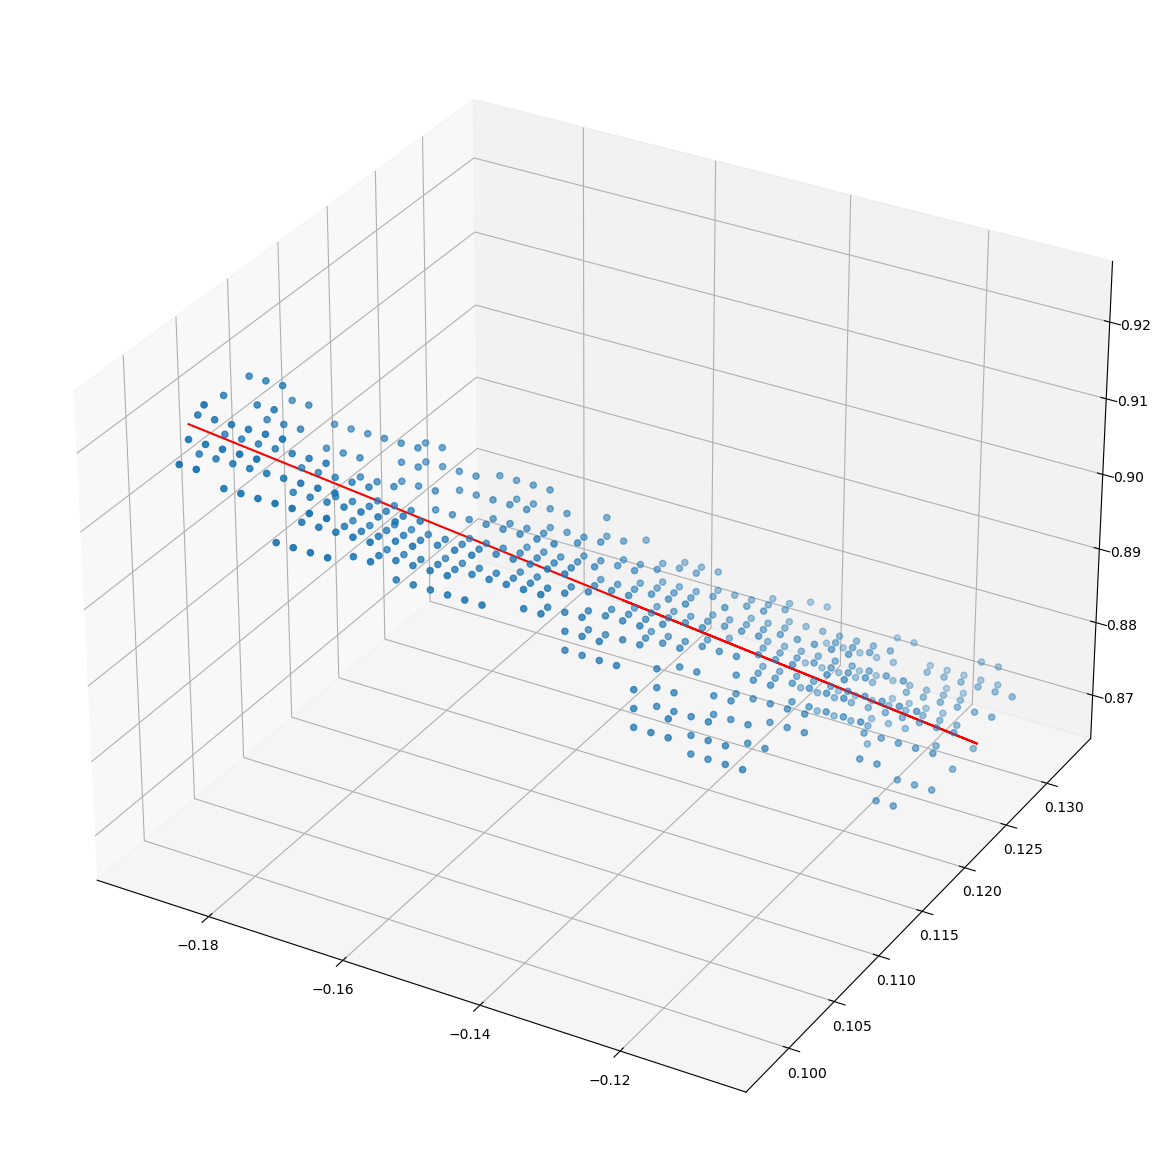

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_line(ax, data: np.ndarray, direction: np.ndarray) -> None:
    mean_vector = np.mean(data, axis=0)
    diff = data - mean_vector
    projection = diff @ direction
    line_points = np.array([mean_vector, mean_vector + direction * np.min(projection), mean_vector + direction * np.max(projection)])
    ax.plot(line_points[:,0], line_points[:,1], line_points[:,2], 'r')
    return None

def get_longest_axis(data):
    cov = np.cov(data.T)
    w, v = np.linalg.eigh(cov)
    return v.T[np.argmax(w)]

# Test
data = np.genfromtxt('final_data/object.pcd')
result = get_longest_axis(data)
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
plot_line(ax, data, result)
ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()

## Task 2.2 - Theory questions
    1. Applications of SVD
    2. Applications of PCA
    3. Vector Norm
    4. Matrix Norm
    5. Condition Number
    6. eigenvalue and eigenvector
    7. Properties of rotation matrices
    8. Euler angel and fixed angel
    9. Methods to solve ODE
    10. Applications of jacobian

## Task 2.3 - Markov chain

* You are the mayor of Roboville and covid-19 has struck your town. You have deployed various robots to combat this pandemic. Initially, 80% of the robots are healthy, while the rest are temporarily broken.

* Based on past information of the robots, we have the following statistics: after each week,

    5% of the healthy robots break down
    80% of the broken robots are repairable, while the rest are non-repairable
    85% of the repaired robots get completely fixed (i.e. they become healthy), while the rest break down again

* Since you have to arrange the service centers for the broken robots, you would like to develop a forecast model that uses the above information for obtaining the percentage of broken robots in the future.
* Hint: model the scenario using matrix & vector. For example, you can represent robot state using 4-valued vector

In [4]:
import numpy as np

broken_5 = None
# YOUR CODE HERE

def iterate_chain(T: np.array, x0: np.array, n: int) -> np.array:
    x = np.array(x0)
    for i in range(n): x = T.dot(x)
    return x

## This array represents the problem using 4*4 array with this order (healthy, broken, repairable, non-repairable)
T = np.array([[0.95, 0.05, 0.00, 0.00], 
              [0.00, 0.00, 0.80, 0.20], 
              [0.85, 0.15, 0.00, 0.00],
              [0.00, 0.00, 0.00, 1.00]]).T

x0 = np.array([0.80, 0.20, 0.0, 0.0])[np.newaxis].T

n = 5
x5 = iterate_chain(T, x0, n)
x5 = x5 * 100 ## Convert to percentage
broken_5 = x5[1] ## [1] is the index of broken robots

# 3. SVD

## Task 3.1 - RANSAC

In [5]:
from typing import Tuple, Sequence

import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loading point cloud data. 
point_cloud = np.genfromtxt("final_data/pointcloud.pcd")

# Please assign the filtered point cloud to "points"
points = None

# YOUR CODE HERE
points = point_cloud[(point_cloud[:,0]<1.05) & (point_cloud[:,2]>0.75)]
print(points.shape)

(6085, 3)


In [6]:
import math 
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def ransac(points: np.ndarray, N: int, s: int, t: float) -> Tuple[float, float, float, float]:
    inliers = []
        
    for i in range(N):
        rand_samples_idx = random.sample(range(points.shape[0]), s)
        rand_samples = points[rand_samples_idx,:]
        a, b, c, d = fit_plane(rand_samples)
        distance = (a * points[:,0] + b * points[:,1] + c * points[:,2] + d) / np.sqrt(a ** 2 + b ** 2 + c ** 2)
        candidates_idx = np.where(np.abs(distance) <= t)[0]
        if len(candidates_idx) > len(inliers): 
            print("+")
            print(len(inliers))
            inliers = candidates_idx
            
    return fit_plane(points[inliers,])

def fit_plane(points: np.ndarray) -> Tuple[float, float, float, float]:
    A = np.hstack((points, np.ones(len(points))[np.newaxis].T))
    U, S, VT = np.linalg.svd(A)        
    a, b, c, d = VT[-1]
    return a, b, c, d

a, b, c, d = [None,None,None,None]

p = 0.99 # Desired probability
u = 0.7  # Represent the probability of observing an inliers
v = 1-u  # Represent the probability of observing an outlier
m = 4    # Minimum number of points
t = 0.1  # Treshold for the distance between a point and plane

## 1 − p = (1 − u^m)^N
N = math.floor((math.log(1-p)/math.log(1-(1-v)**m))) # Maximum number of iterations

a, b, c, d = ransac(points, N, m, t)

+
0
+
5674
+
5716
+
5757
+
5823


C:\Users\Azizm\AppData\Local\Temp\ipykernel_12620\698474890.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


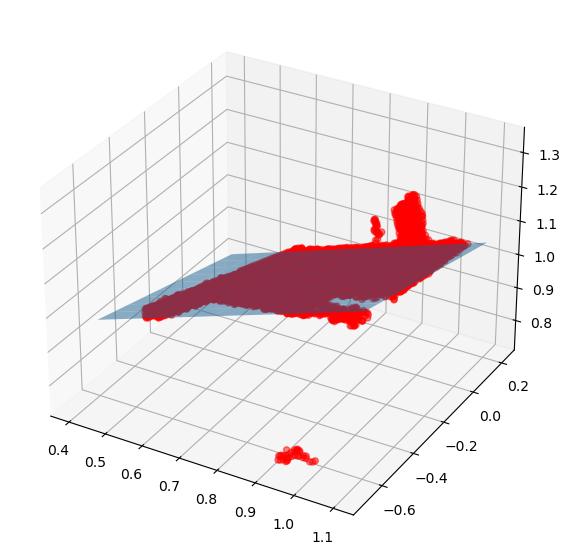

In [7]:
x = np.linspace(0.4,1.1,10)
y = np.linspace(-0.6,0.2,10)
X,Y = np.meshgrid(x,y)
Z = (-d - a*X - b*Y) / c

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], c = 'r', alpha=0.5)
ax.plot_surface(X, Y, Z, alpha=0.5)

plt.show()

# 4. Applications of SVD

## Task 4.1 - Line fitting

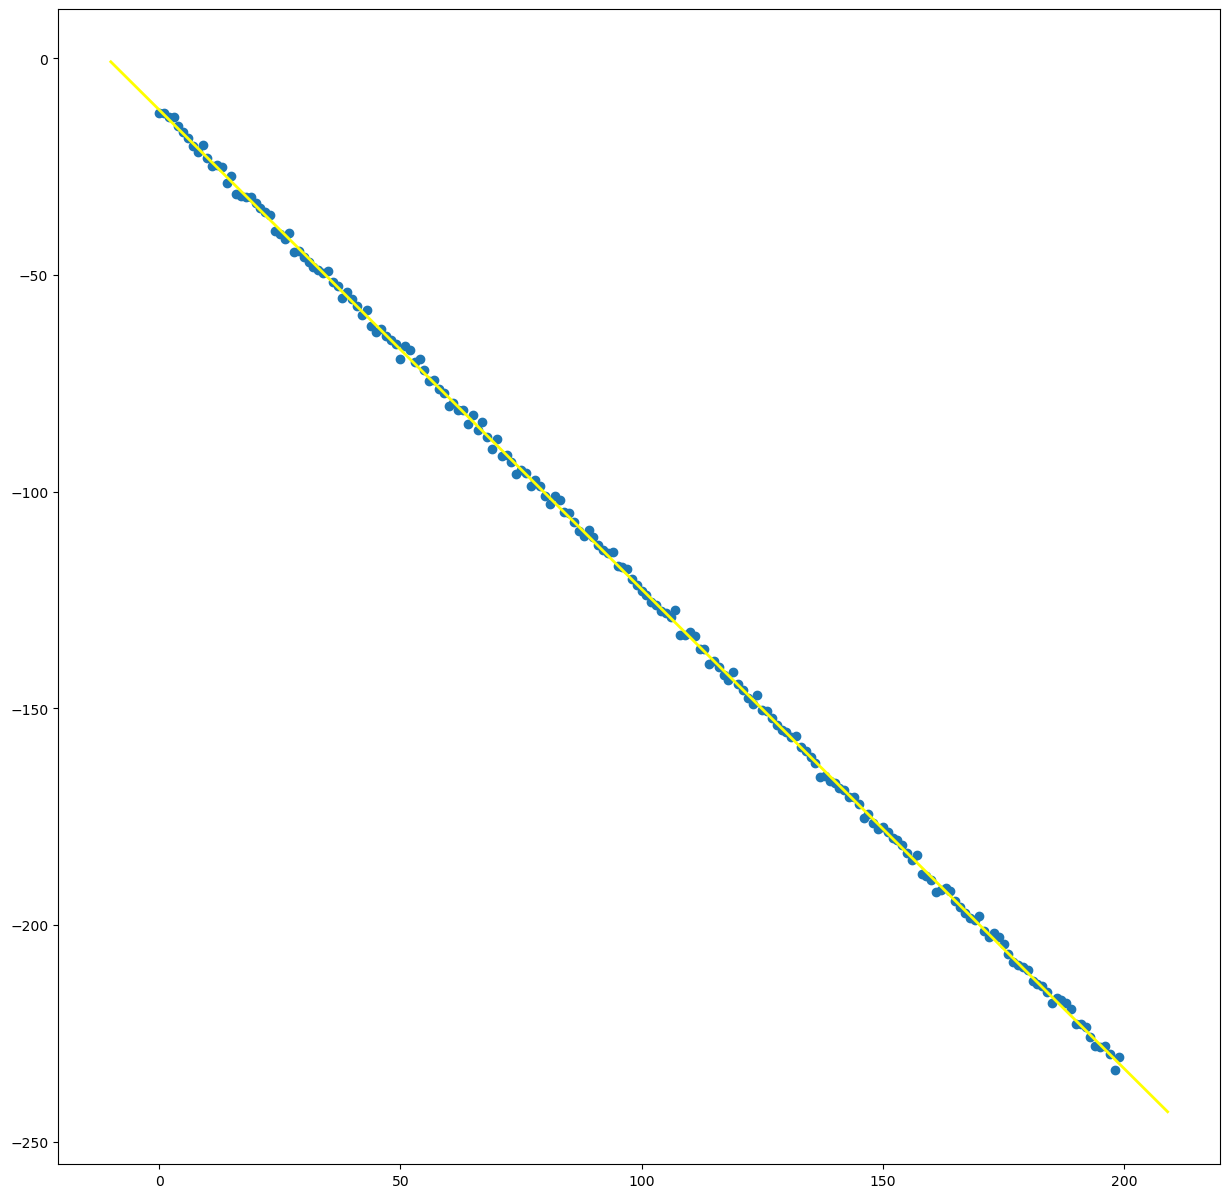

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Tuple, Sequence

def line_fit(data: np.array) -> Tuple[float, float]:

    A = np.hstack((data[:,0][np.newaxis].T, np.ones((data.shape[0], 1))))
    b = data[:,1][np.newaxis].T
    x = np.linalg.pinv(A).dot(b)
    
    m = x[0]
    c = x[1]
    
    return m, c

# we load the data and find the line parameters
data = np.load('final_data/line.npy')
m, c = line_fit(data)

# we plot the points and the overlayed line
x = np.linspace(np.min(data[:,0]) - 10, np.max(data[:,0]) + 10, 1000)
y = m * x + c
fig = plt.figure(figsize=(15,15))
plt.scatter(data[:,0], data[:,1])
plt.plot(x, y, color='yellow', linewidth=2)
plt.show()

## Task 4.2 - Parallel lines

* In this case, we have two set of points, denoted by ${P_i}, i = 1, ..., p$ and ${Q_j}, j=1, ..., q$ and due to the fact that they are parallel to each other, they have the same normal vector. Therefore the equation for lines are:
$$ c_1 + n_1 x + n_2 y = 0 $$ 
$$ c_2 + n_1 x + n_2 y = 0 $$

* One of the applications of SVD is line fitting and in our case, it has two important steps:<br>
1- Build $A$ matrix as a combination of first and second points and calculate $c_1, c_2, n_1, n_2$ <br>
2- Use $c_1, c_2, n_1, n_2$ in above equations and solve for y

* For the first step, we need to create a matrix with below structure:
$$ A=\begin 
{bmatrix}   1 & 0 & xP_1 & yP_1 \\ 1 & 0 & xP_2 & yP_2 \\ : & : & : & : \\ 1 & 0 & xP_p & yP_p \\
            0 & 1 & xQ_1 & yQ_1 \\ 0 & 1 & xQ_2 & yQ_2 \\ : & : & : & : \\ 0 & 1 & xQ_p & yQ_p
\end{bmatrix} $$
<br><br>
* After creating $A$ matrix, we perform $QR$ decomposition and then SVD to extract $n_1, n_2$ and $c_1, c_2$. But these parameters must be used in below equation to solve for $y$:
$$ y_1 = \frac{(-c_1 - n_1 * x_i)} {n_2} $$ <br>
$$ y_2 = \frac{(-c_2 - n_1 * x_i)} {n_2} $$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def clsq (A: np.array, dim: int) -> tuple:
    p = min(A.shape)
    m = p - dim
    Q, R = np.linalg.qr (A, mode='complete')
    _, _, VT = np.linalg.svd (R[m:p, m:p])
    n = VT[dim-1,:]
    c = np.linalg.lstsq(-R[0:m, 0:m], R[0:m, m: p].dot(n),rcond=None)[0]
    return (c, n)

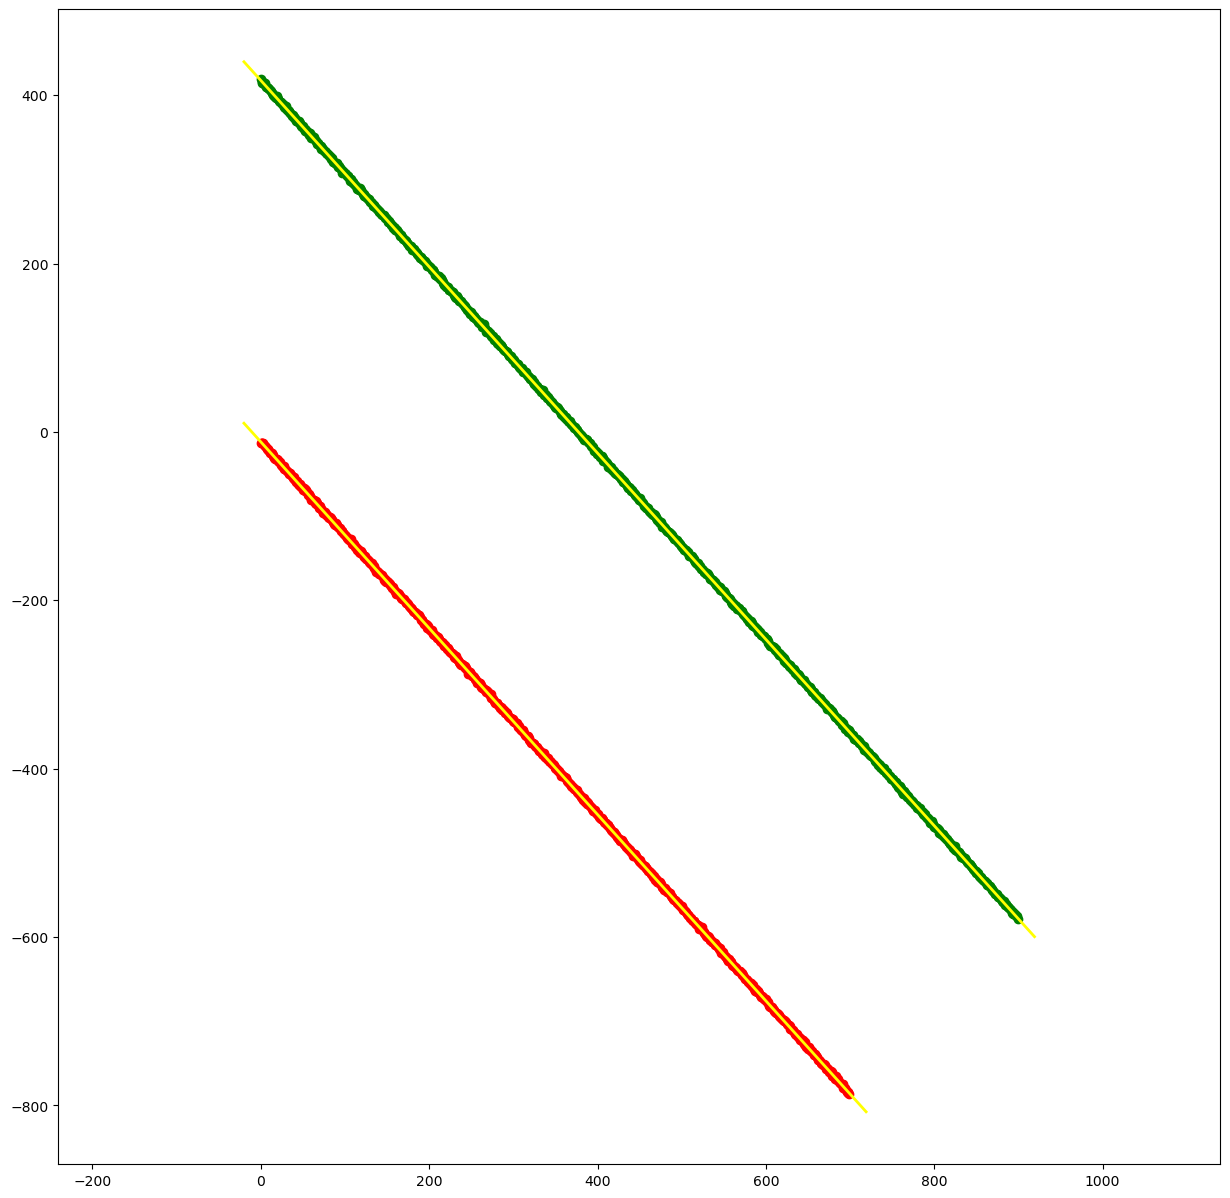

In [10]:
def compute_parallel_lines(first_line: np.array,
                           second_line: np.array) -> tuple:
    """
    first_line   np.array of size n x 2 containing the points on the first line
    second_line  np.array of size n x 2 containing the points on the second line
    
    return: (c, n) = a tuple of (n1, n2), c = a tuple of (c1, c2)
    """
    # YOUR CODE HERE
    len_P1 = first_line.shape[0]
    len_Q1 = second_line.shape[0]
    A1 = np.hstack((np.ones(len_P1)[np.newaxis].T, np.zeros(len_P1)[np.newaxis].T , first_line))
    A2 = np.hstack((np.zeros(len_Q1)[np.newaxis].T, np.ones(len_Q1)[np.newaxis].T , second_line))
    
    A = np.vstack((A1, A2))
    
    return clsq(A, 2)
    
P1 = np.load('final_data/P1.npy')
Q1 = np.load('final_data/Q1.npy')

c, n = compute_parallel_lines(P1, Q1)    

fig = plt.figure(figsize=(15,15))
plt.scatter(P1[:,0], P1[:,1], color = 'r')
plt.scatter(Q1[:,0], Q1[:,1], color = 'g')

x1 = np.linspace(np.min(P1[:,0]) - 20, np.max(P1[:,0]) + 20, 100)
# Instead of y = m * x + c, for each linen use c + n1x + n2y = 0
y1 = (-c[0] - n[0] * x1) / n[1]
plt.plot(x1, y1, color='yellow', linewidth=2)

x2 = np.linspace(np.min(Q1[:,0]) - 20, np.max(Q1[:,0]) + 20, 100)
# Instead of y = m * x + c, for each linen use c + n1x + n2y = 0
y2 = (-c[1] - n[0] * x2) / n[1]
plt.plot(x2, y2, color='yellow', linewidth=2)
plt.axis('equal')
plt.show()

# plt.plot(x, y, color='g', linewidth=2)
# plt.show()

## Task 4.3 - Perpendicular lines

* In this case, we have two set of points, denoted by ${P_i}, i = 1, ..., p$ and ${Q_j}, j=1, ..., q$ and due to the fact that they are <b>perpendicular</b> to each other the equation for lines are:
$$ c_1 + n_1 x_1 + n_2 y_1 = 0 $$ 
$$ c_2 - n_2 x_2 + n_1 y_2 = 0 $$

* One of the applications of SVD is line fitting and in our case, it has two important steps:<br>
1- Build $A$ matrix as a combination of first and second points and calculate $c_1, c_2, n_1, n_2$ <br>
2- Use $c_1, c_2, n_1, n_2$ in above equations and solve for $y$.

* For the first step, we need to create a matrix with below structure:
$$ A=\begin 
{bmatrix}   1 & 0 & xP_1 & yP_1 \\ 1 & 0 & xP_2 & yP_2 \\ : & : & : & : \\ 1 & 0 & xP_p & yP_p \\
            0 & 1 & yQ_1 & -xQ_1 \\ 0 & 1 & yQ_2 & -xQ_2 \\ : & : & : & : \\ 0 & 1 & yQ_q & -xQ_q
\end{bmatrix} $$
<br><br>
* After creating $A$ matrix, we perform $QR$ decomposition and then SVD to extract $n_1, n_2$ and $c_1, c_2$. But these parameters must be used in below equation to solve for $y$:
$$ y_1 = \frac{(-c_1 - n_1 * x_1)} {n_2} $$ <br>
$$ y_2 = \frac{(-c_2 + n_2 * x_2)} {n_1} $$

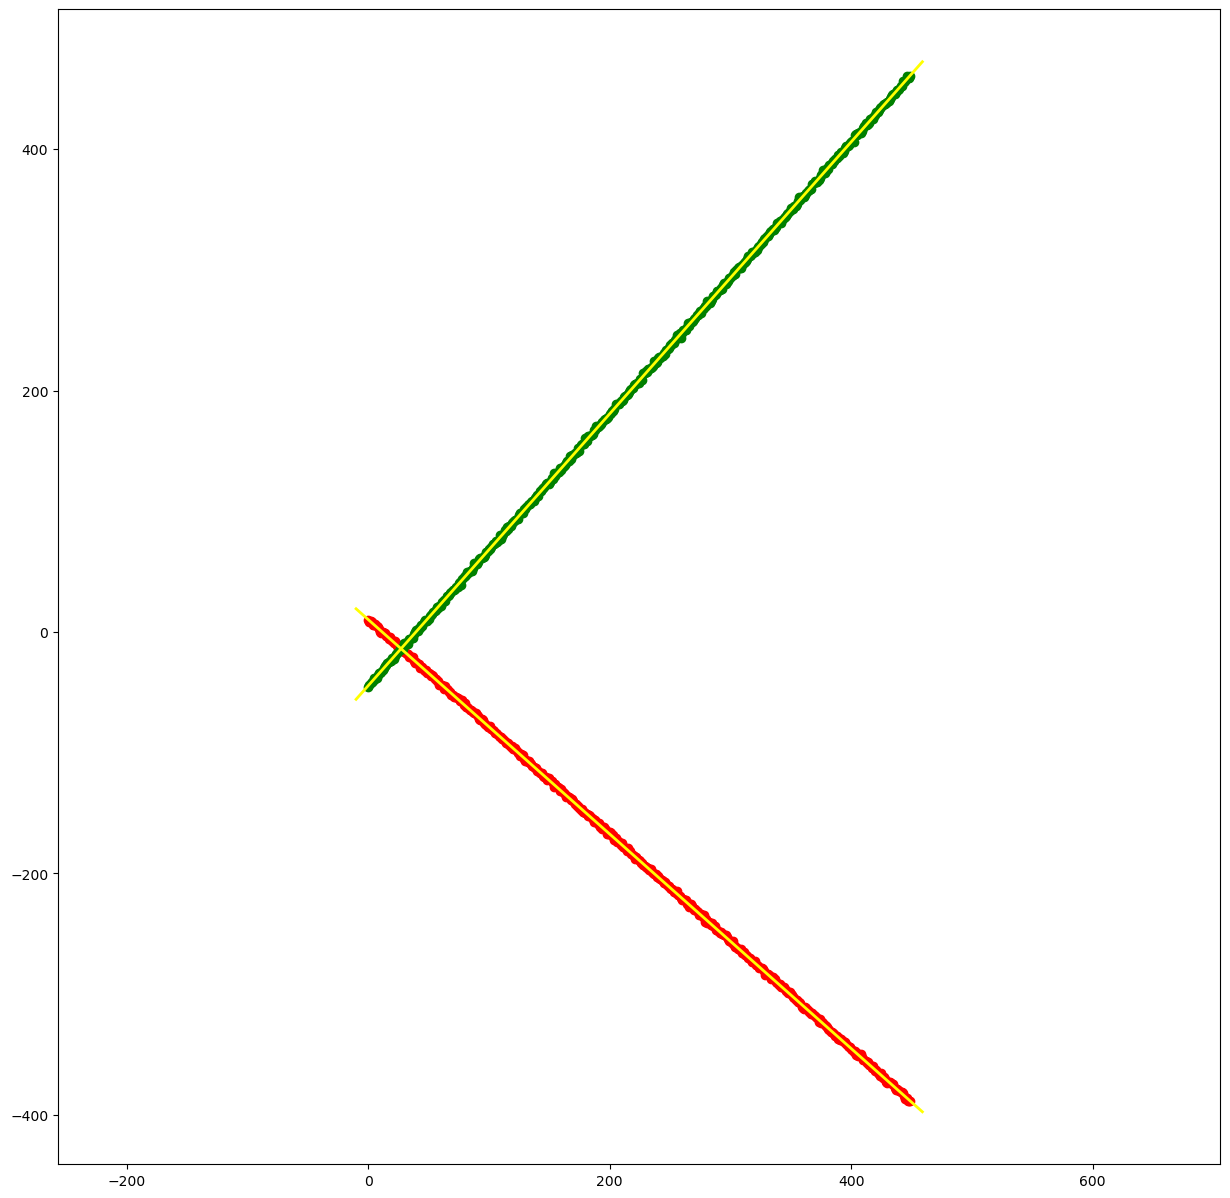

In [11]:
def compute_perpendicular_lines(first_line: np.array, second_line: np.array) -> tuple:
    # YOUR CODE HERE
    len_P2 = first_line.shape[0]
    len_Q2 = second_line.shape[0]
    A1 = np.hstack((np.ones(len_P2)[np.newaxis].T, np.zeros(len_P2)[np.newaxis].T , first_line))
    
    Q2x = np.negative(second_line[:, 0][np.newaxis])
    Q2y = second_line[:, 1][np.newaxis]
    A2 = np.hstack((np.zeros(len_Q2)[np.newaxis].T, np.ones(len_Q2)[np.newaxis].T , Q2y.T, Q2x.T))
    
    A = np.vstack((A1, A2))  
    
    return clsq(A, 2)
    
P2 = np.load('final_data/P2.npy')
Q2 = np.load('final_data/Q2.npy')
c, n = compute_perpendicular_lines(P2, Q2)    

fig = plt.figure(figsize=(15,15))
plt.scatter(P2[:,0], P2[:,1], color = 'r')
plt.scatter(Q2[:,0], Q2[:,1], color = 'g')

x1 = np.linspace(np.min(P2[:,0]) - 10, np.max(P2[:,0]) + 10, 100)
y1 = (-c[0] - n[0] * x1) / n[1]
plt.plot(x1, y1, color='yellow', linewidth=2)

x2 = np.linspace(np.min(Q2[:,0]) - 10, np.max(Q2[:,0]) + 10, 100)
y2 = (-c[1] + n[1] * x2) / n[0]
plt.plot(x2, y2, color='yellow', linewidth=2)
plt.axis('equal')
plt.show()

## Task 4.4 - Rectangular

* In this case, we have four set of points, denoted by ${P_i}, i = 1, ..., p$ and ${Q_j}, j=1, ..., q$ and ${R_k}, k = 1, ..., R$ and ${S_n}, n = 1, ..., n$ and due to the fact that they are two by two <b>parallel</b> to each other thus they have the same normal vector and at the same time they are <b>perpendicular</b> to each other. Therefore the equation for lines are:
$$ c_1 + n_1 x_1 + n_2 y_1 = 0 $$ 
$$ c_2 - n_2 x_2 + n_1 y_2 = 0 $$
$$ c_3 + n_1 x_3 + n_2 y_3 = 0 $$
$$ c_4 - n_2 x_4 + n_1 y_4 = 0 $$ 
<br>
* One of the applications of SVD is line fitting and in our case, it has two important steps:<br>
1- Build $A$ matrix as a combination of all points (4 matrices) and calculate $c_1, c_2, c_3, c_4, n_1, n_2$ <br>
2- Use $c_1, c_2, c_3, c_4, n_1, n_2$ in above equations and solve for $y$.

* For the first step, we need to create a matrix with below structure:
$$ A=\begin 
{bmatrix}   1 & 0 & 0 & 0 & xP_1 & yP_1 \\ 1 & 0 & 0 & 0 & xP_2 & yP_2 \\:&:&:&:&:&:\\1 & 0 & 0 & 0 & xP_p & yP_p \\
            0 & 1 & 0 & 0 & yQ_1 & -xQ_1 \\ 0 & 1 & 0 & 0 & yQ_2 & -xQ_2 \\:&:&:&:&:&:\\0 & 1 & 0 & 0 & yQ_q & -xQ_q \\
            0 & 0 & 1 & 0 & xR_1 & yR_1 \\ 0 & 0 & 1 & 0 & xR_2 & yR_2 \\:&:&:&:&:&:\\0 & 0 & 1 & 0 & xR_r & yR_r \\
            0 & 0 & 0 & 1 & yS_1 & -xS_1 \\  0 & 0 & 0 & 1 & yS_2 & -xS_2 \\:&:&:&:&:&:\\0 & 0 & 0 & 1& yS_s & -xS_s \\
\end{bmatrix} $$
<br><br>
* After creating $A$ matrix, we perform $QR$ decomposition and then SVD to extract $n_1, n_2$ and $c_1, c_2, c_3, c_4$. But these parameters must be used in below equation to solve for $y$:
$$ y_1 = \frac{(-c_1 - n_1 * x_1)} {n_2} $$ <br>
$$ y_2 = \frac{(-c_2 + n_2 * x_2)} {n_1} $$ <br>
$$ y_3 = \frac{(-c_3 - n_1 * x_3)} {n_2} $$ <br>
$$ y_4 = \frac{(-c_4 + n_2 * x_4)} {n_1} $$ <br>


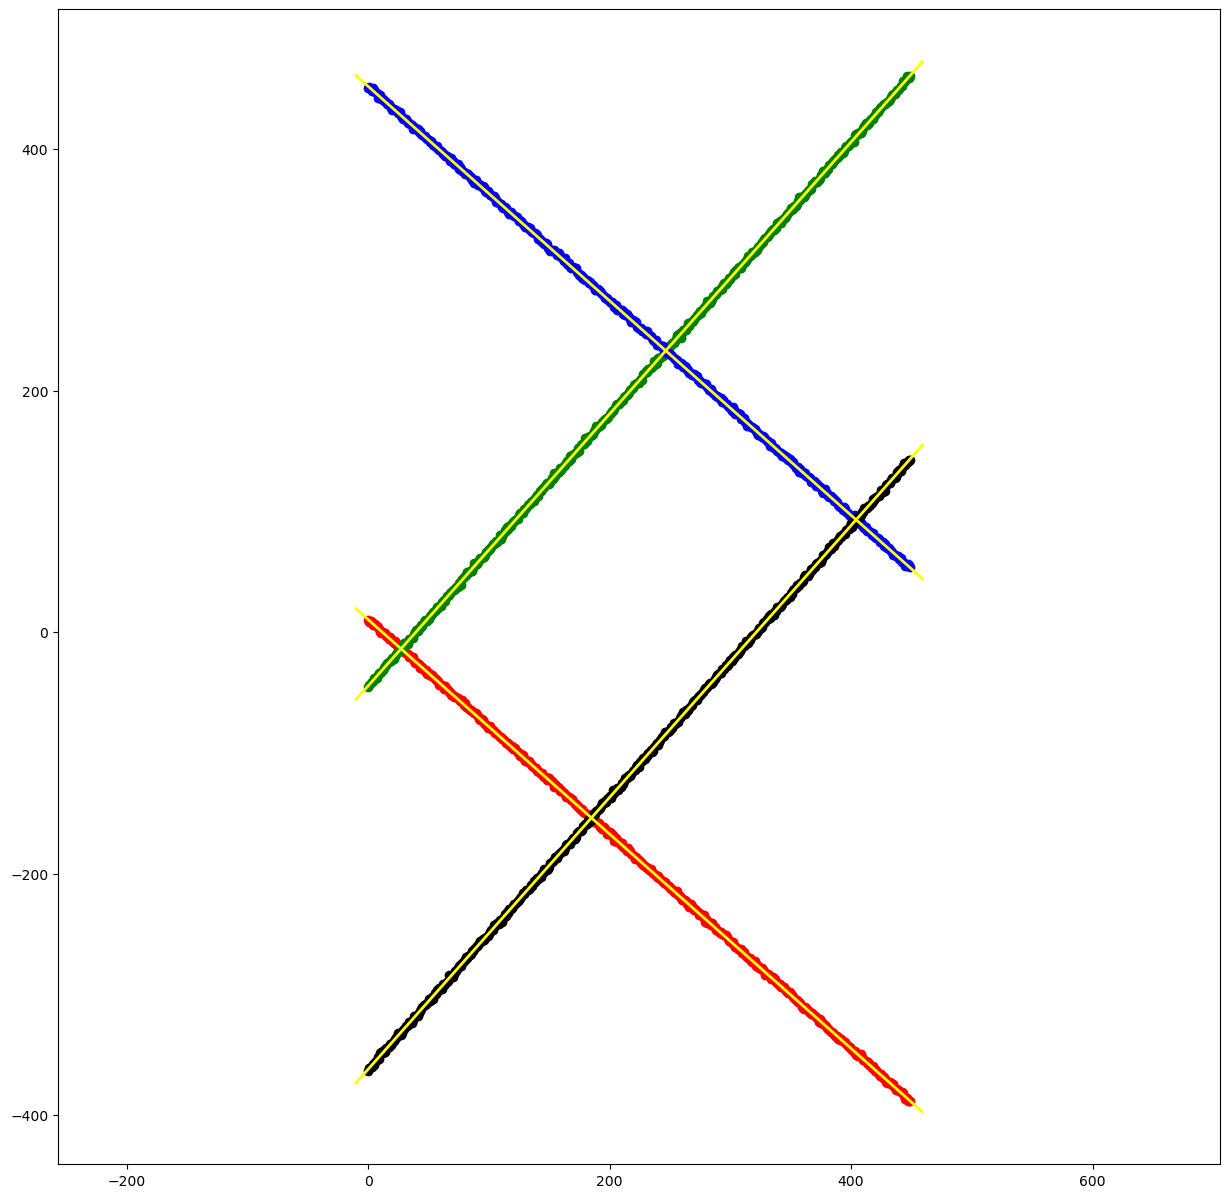

In [12]:
def compute_rectangle_lines(first_line: np.array, second_line: np.array, third_line: np.array, fourth_line: np.array) -> tuple:
    
    # YOUR CODE HERE
    len_P2 = first_line.shape[0]
    len_Q2 = second_line.shape[0]
    len_R2 = third_line.shape[0]
    len_S2 = fourth_line.shape[0]
    
    A1 = np.hstack((np.ones(len_P2)[np.newaxis].T,
                    np.zeros(len_P2)[np.newaxis].T ,
                    np.zeros(len_P2)[np.newaxis].T ,
                    np.zeros(len_P2)[np.newaxis].T ,first_line))
    
    Q2x = np.negative(second_line[:, 0][np.newaxis])
    Q2y = second_line[:, 1][np.newaxis]
    A2 = np.hstack((np.zeros(len_Q2)[np.newaxis].T ,
                    np.ones(len_Q2)[np.newaxis].T ,
                    np.zeros(len_Q2)[np.newaxis].T , 
                    np.zeros(len_Q2)[np.newaxis].T , Q2y.T, Q2x.T))
    
    A3 = np.hstack((np.zeros(len_P2)[np.newaxis].T ,
                    np.zeros(len_P2)[np.newaxis].T ,
                    np.ones(len_P2)[np.newaxis].T ,
                    np.zeros(len_P2)[np.newaxis].T ,third_line))
        
    S2x = np.negative(fourth_line[:, 0][np.newaxis])
    S2y = fourth_line[:, 1][np.newaxis]
    A4 = np.hstack((np.zeros(len_Q2)[np.newaxis].T ,
                    np.zeros(len_S2)[np.newaxis].T ,
                    np.zeros(len_S2)[np.newaxis].T ,
                    np.ones(len_S2)[np.newaxis].T ,S2y.T, S2x.T))
    
    A = np.vstack((A1, A2, A3, A4))  
    
    return clsq(A, 2)
    
P2 = np.load('final_data/P2.npy')
Q2 = np.load('final_data/Q2.npy')
R2 = np.load('final_data/R2.npy')
S2 = np.load('final_data/S2.npy')   

fig = plt.figure(figsize=(15,15))
plt.scatter(P2[:,0], P2[:,1], color = 'red')
plt.scatter(Q2[:,0], Q2[:,1], color = 'green')
plt.scatter(R2[:,0], R2[:,1], color = 'blue')
plt.scatter(S2[:,0], S2[:,1], color = 'black')

c, n = compute_rectangle_lines(P2, Q2, R2, S2) 

x1 = np.linspace(np.min(P2[:,0]) - 10, np.max(P2[:,0]) + 10, 100)
y1 = (-c[0] - n[0] * x1) / n[1]
plt.plot(x1, y1, color='yellow', linewidth=2)

x2 = np.linspace(np.min(Q2[:,0]) - 10, np.max(Q2[:,0]) + 10, 100)
y2 = (-c[1] + n[1] * x2) / n[0]
plt.plot(x2, y2, color='yellow', linewidth=2)

x3 = np.linspace(np.min(R2[:,0]) - 10, np.max(R2[:,0]) + 10, 100)
y3 = (-c[2] - n[0] * x3) / n[1]
plt.plot(x3, y3, color='yellow', linewidth=2)

x4 = np.linspace(np.min(S2[:,0]) - 10, np.max(S2[:,0]) + 10, 100)
y4 = (-c[3] + n[1] * x4) / n[0]
plt.plot(x4, y4, color='yellow', linewidth=2)
plt.axis('equal')
plt.show()

## Task 4.5 - Circle fitting

### Circle fitting

Even though it might seem so, we are not actually limited to fitting lines using the SVD. Other problems, such as that of fitting a circle, can be expressed in a linear least squares problem form as well, so they can be solved using the SVD.

Just as above, let's suppose that we are given a set of (potentially noisy) points that roughly lie on a circle and that we want to reconstruct the parameters of the circle, namely its centre $(a,b)$ and radius $r$. Assuming that we have $n$ points, we can write $n$ circle equations of the form

\begin{equation*}
    (x_i - a)^2 + (y_i - b)^2 = r^2
\end{equation*}

These are not linear equations, but let's square the terms and see where that gets us:

\begin{equation*}
    x_i^2 - 2ax_i + a^2 + y_i^2 - 2by_i + b^2 = r^2
\end{equation*}

At the moment, squaring the terms doesn't seem to have helped a lot. Anyway, let's now move all the unknown terms to one side, leaving the known ones on the other side and see if that helps:

\begin{equation*}
    2ax_i + 2by_i + r^2 - a^2 - b^2 = x_i^2 + y_i^2
\end{equation*}

We now have some nice linear terms on the left-hand side and a known term on the right-hand side, so we are getting closer to a linear system; we still have the squares of our unknowns, though, which prevents us from writing this as a linear equation. Now, the key idea to solving this problem is to note that we can define $k = r^2 - a^2 - b^2$ to be a new unknown parameter; if we further define $c_1 = 2a$, $c_2 = 2b$, and $s = x_i^2 + y_i^2$, we can write the above equation as

\begin{equation*}
    c_1x_i + c_2y_i + k = s
\end{equation*}

which is indeed linear. We now have three unknowns - $c_1$, $c_2$, and $k$ - and a set of $n$ equations, which can be written in the matrix form $A\mathbf{x} = \mathbf{b}$ as

\begin{equation*}
    \begin{pmatrix}
        x_1 & y_1 & 1 \\
        \vdots & \vdots & \vdots \\
        x_n & y_n & 1 \\
    \end{pmatrix}
    \begin{pmatrix} c_1 \\ c_2 \\ k \end{pmatrix}
    = \begin{pmatrix}
        x_1^2 + y_1^2 \\
        \vdots \\
        x_n^2 + y_n^2 \\
    \end{pmatrix}
\end{equation*}

This is an overdetermined system that we can solve using the pseudo-inverse of $A$, just as we did in the line fitting case. Once we solve the system, we can find the parameters of the circle as

\begin{align*}
    a &= \frac{c_1}{2} \\
    b &= \frac{c_2}{2} \\
    r &= \sqrt{k + a^2 + b^2}
\end{align*}

One important thing to note here is that we were only able to define $k$ just as we have done because it constrains the value of $r$ through the values of the other unknowns, namely $a$ and $b$; if this were not the case, we would not have been able to use this trick because we would not have been able to guarantee the consistency of the equations involving the unknown parameters.

We are now going to verify that what we have done here does indeed allow us to find the parameters of a circle. In order to do that, let's first generate a set of noisy circle points and plot them.

In [13]:
noise_std = 0.1
center = np.array([1., 2.])
theta = np.linspace(0., 2 * np.pi, 100)
x = center[0] + np.cos(theta) + np.random.normal(0., noise_std, 100)
y = center[1] + np.sin(theta) + np.random.normal(0., noise_std, 100)

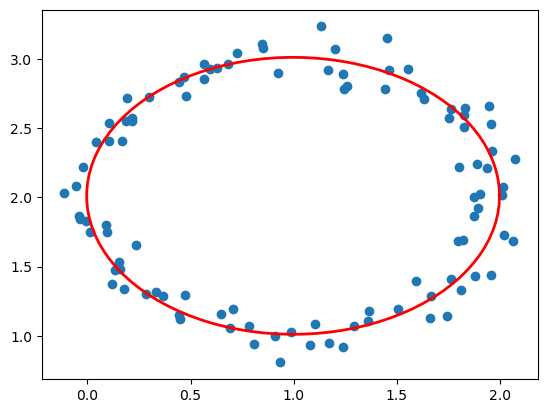

In [14]:
# creating the matrix A
A = np.hstack((x[np.newaxis].T, y[np.newaxis].T, np.ones((len(x), 1))))

# creating the right-hand side vector b
b = (x**2 + y**2)[np.newaxis].T

# finding the pseudo-inverse of A
U, s, Vt = np.linalg.svd(A)

s_inv = np.array(s)

for i in range(len(s_inv)):
    if abs(s_inv[i] - 0.) > 1e-5:
        s_inv[i] = 1. / s_inv[i]
S_inv = np.zeros((Vt.shape[0], U.shape[1]))
np.fill_diagonal(S_inv, s_inv)

A_pinv = Vt.T.dot(S_inv).dot(U.T)

# we can now solve the system using A's pseudo-inverse
X = A_pinv.dot(b)

# X = np.linalg.pinv(A).dot(b)

a = X[0] / 2.
b = X[1] / 2.
r = np.sqrt(X[2] + a**2 + b**2)

x_new = a + np.cos(theta)
y_new = b + np.sin(theta)
plt.scatter(x, y)
plt.plot(x_new, y_new, color='r', linewidth=2)
plt.show()

# 5. Jacobian

# 6 & 7. ODE (part 1, 2)

### Task 6.1
* Explain followings. Please try to utilize mathematical language rather than lengthy-word descriptions.

    * General solution
    * Particular solution
    * Initial Value Problem (IVP)
    * Boundary Value Problem (BVP)

#### General solution:
* Obtainig a solution for a differential equation <b>without considering any initial or boundary conditions</b> is called a genral solution witch results in unknown constants with a whole set of integral curves.
* To define the general solution, consider following equation:
$$ y(x) = C_1y_1(x) + C_2y_2(x) + ... + C_ny_n(x) $$ <br>
* Where $y(x)$ is the general solution, $(y_1(x), y_2(x), ..., y_n(x))$ are $n$ linearly independent functions and $n$ is the order of differential equation. $C_1, C_2, ..., C_n$ are also the constants that can be calculated by applyting initial or boundary conditions.

#### Particular solution:
* Obtaining a solution for a differential equation <b>with the help of any given condition</b> is called a particular solution. These inital or boundary conditions can be used to solve for the constants obtained from the general solution. In other word, we can filter out a bunch of integral curves with the help of initial or boundary conditions.
* To define a particular solution, consider following equation:
$$ y(x) = f(x, C_1, C_2, ..., C_n) $$ <br>
* Where $y(x)$ is the particular solution of ODE and $f(x, C_1, C_2, ..., C_n)$ is a fuction of independent variable $x$ and $n$ constants $(C_1, C_2, ..., C_n)$ that are calculated by applying initial or boundary condifions

#### Initial Value Problem (IVP)
* IVP is used for finding a solution for an ODE which <b>satisfies certain initial conditions</b>. In this type of problem, we are given an ODE and a set of initial conditions that specifies the value of unknown function and/or it's derivatives on a particular point.
* To define the initial value problem, consider following equation:
$$ y'(x) = f(x, y(x)), y(x_0) = y_0 $$ <br>
* Where $y(x)$ is the unknown function, $f(x, y(x))$ is a given function of $x$ and $y(x)$, $x_0$ is a given initial value of $x$, and $y_0$ is a given initial value of $y(x)$ at $x = x0$.

#### Boundary Value Problem (BVP)
* BVP is used for finding a solution for an ODE which <b>satisifies certain initial conditions at both ends</b> of the interval which the function is defined.
* To define the boundary value problem, consider following equation:
$$ y''(x) = f(x, y(x), y'(x)), a \leq x \leq b $$ <br>
$$ y(a) = ya, y(b) = yb $$ <br>
* where $y(x)$ is the unknown function, $f(x, y(x)$, $y'(x))$ is a given function of $x$, $y(x)$, and $y'(x)$, $a$ and $b$ are given values that define the interval of interest, and $ya$ and $yb$ are given values that specify the boundary conditions at the endpoints.

### Task 6.2
* Solve the following ODE using sympy
\begin{equation*} \frac{dy}{dt} - 4y = 10 \end{equation*}

In [15]:
import sympy as sp

t = sp.Symbol('t')
y = sp.Function('y')(t)
y_prime = sp.Derivative(y, t)
eq = sp.Eq(y_prime - 4*y, 10)
general_solution = sp.dsolve(eq)

display(general_solution)

Eq(y(t), C1*exp(4*t) - 5/2)

### Task 6.3
* Solve the following initial value problem using sympy
\begin{align*} &y'' + 3y' - 4y = 0 \\ &y(0) = 0, y'(0) = 3 \end{align*}

In [16]:
import sympy as sp

t = sp.Symbol('t')
y = sp.Function('y')(t)
y_prime = y.diff(t)
y2_prime = y.diff(t, 2)

eq = sp.Eq(y2_prime + 3*y_prime - 4*y, 0)
general_solution = sp.dsolve(eq)

display(general_solution)

const_eq1 = sp.Eq(general_solution.rhs.subs(t, 0), 0)
const_eq2 = sp.Eq(general_solution.rhs.diff(t).subs(t, 0), 3)
constants = sp.solve([const_eq1, const_eq2])

particular_solution = general_solution.subs(constants)
display(particular_solution)

Eq(y(t), C1*exp(-4*t) + C2*exp(t))

Eq(y(t), 3*exp(t)/5 - 3*exp(-4*t)/5)

### Task 6.4
* Solve the following initial value problem using sympy
\begin{align*} &y'' + 3y' - 4y = \sin(2t) \\ &y(0) = 0, y'(0) = 3 \end{align*}

In [17]:
import sympy as sp

t = sp.Symbol('t')
y = sp.Function('y')(t)
y_prime = y.diff(t)
y2_prime = y.diff(t, 2)

eq = sp.Eq(y2_prime + 3*y_prime - 4*y, sp.sin(2*t))

general_solution = sp.dsolve(eq)
display(general_solution)

const_eq1 = sp.Eq(general_solution.rhs.subs(t, 0), 0)
const_eq2 = sp.Eq(general_solution.rhs.diff(t).subs(t, 0), 3)
constants = sp.solve([const_eq1, const_eq2])

particular_solution = general_solution.subs(constants)
display(particular_solution)

Eq(y(t), C1*exp(-4*t) + C2*exp(t) - 2*sin(2*t)/25 - 3*cos(2*t)/50)

Eq(y(t), 17*exp(t)/25 - 2*sin(2*t)/25 - 3*cos(2*t)/50 - 31*exp(-4*t)/50)

### Task 6.5
* In City A there are 200 of a certain species of an insect. The daily population growth due to reproduction is $\frac {1}{8}$ the current population. Also on a daily basis,  10 insects migrate into the area,  22 are eaten by predators, and  8 die of natural causes. Assuming there are no other factors, set up a differential equation to model the situation and solve for the function  𝑃(𝑡)

In [18]:
import sympy as sp

t = sp.Symbol('t')
p = sp.Function('p')(t)
p_prime = sp.Derivative(p, t)

eq = sp.Eq(p_prime, (1/8)*p + 10-22-8)
general_solution = sp.dsolve(eq)
display(general_solution)

const_eq = sp.Eq(general_solution.rhs.subs(t, 0), 200)
constants = sp.solve([const_eq])
particular_solution = general_solution.subs(constants)
display(particular_solution)

Eq(p(t), C1*exp(0.125*t) + 160.0)

Eq(p(t), 40.0*exp(0.125*t) + 160.0)

# 8. Bayes theorem

# 9. Bayes filtering

# 10. Random variables

# 11. Multi-dimensional random variables